<a href="https://colab.research.google.com/github/parag2426/PRODIGY_ML_03/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset

# Dog vs Cat

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !unzip "/content/drive/MyDrive/Data/DogCat/archive (2).zip" -d "/content/drive/MyDrive/Data/DogCat/"


In [3]:
# Open adn manipulate the images
import PIL


**Just to View the Image**

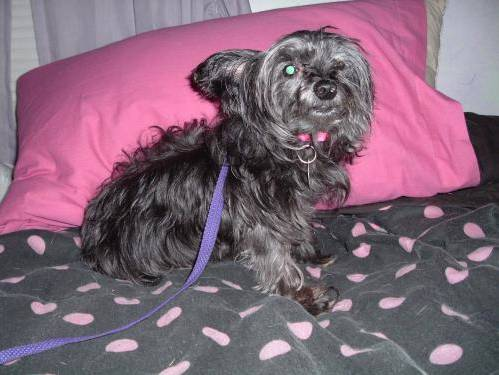

In [4]:
dog_image123 = PIL.Image.open("/content/drive/MyDrive/Data/DogCat/dogcat/train/dogs/dog.0.jpg")
dog_image123

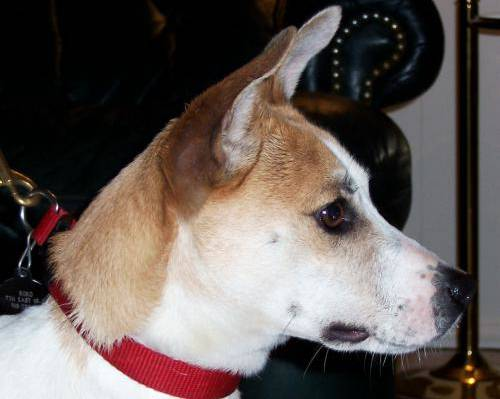

In [5]:
from PIL import Image

filename = "/content/drive/MyDrive/Data/DogCat/dogcat/train/dogs/dog.9860.jpg"
im = Image.open(filename)
im

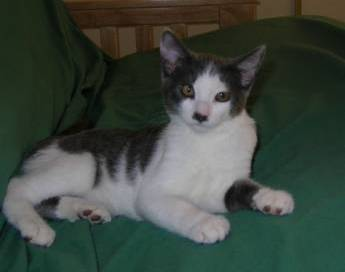

In [6]:
cat_image123 = PIL.Image.open("/content/drive/MyDrive/Data/DogCat/dogcat/train/cats/cat.123.jpg")
cat_image123

# Import libraries


In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Set the Directory Paths

In [8]:
data_dir = '/content/drive/MyDrive/Data/Just folders /'
categories = ['cats', 'dogs']


# Load and Label the Data

In [9]:
data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)  # 0 for cat, 1 for dog

    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img_array, (128, 128))  # Resize image to a fixed size
            data.append(resized_img)
            labels.append(class_num)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

# Convert lists to numpy arrays
data = np.array(data).reshape(-1, 128, 128, 1)
labels = np.array(labels)


# Preprocess the Data


In [10]:
# Normalize the pixel values
data = data / 255.0

# Flatten the images
# data = data.reshape(len(data), -1)


In [11]:
data = np.array(data)
data

array([[[[0.58039216],
         [0.58039216],
         [0.58431373],
         ...,
         [0.26666667],
         [0.35686275],
         [0.50980392]],

        [[0.58823529],
         [0.58823529],
         [0.58823529],
         ...,
         [0.2745098 ],
         [0.35686275],
         [0.5254902 ]],

        [[0.58823529],
         [0.58823529],
         [0.58823529],
         ...,
         [0.25882353],
         [0.32941176],
         [0.51372549]],

        ...,

        [[0.83529412],
         [0.83529412],
         [0.83137255],
         ...,
         [0.81568627],
         [0.83921569],
         [0.74509804]],

        [[0.81568627],
         [0.81568627],
         [0.81568627],
         ...,
         [0.76470588],
         [0.76078431],
         [0.78431373]],

        [[0.8       ],
         [0.79607843],
         [0.79215686],
         ...,
         [0.8       ],
         [0.8       ],
         [0.77254902]]],


       [[[0.04313725],
         [0.03921569],
         [0.03

In [12]:
labels = np.array(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# Flattening: Converts each 2D image into a 1D array of pixel values.

data.reshape(len(data) , 128 * 128)

array([[0.58039216, 0.58039216, 0.58431373, ..., 0.8       , 0.8       ,
        0.77254902],
       [0.04313725, 0.03921569, 0.03529412, ..., 0.92156863, 0.91764706,
        0.87058824],
       [0.39215686, 0.39215686, 0.39215686, ..., 0.8       , 0.81176471,
        0.78431373],
       ...,
       [0.9372549 , 0.94117647, 0.94901961, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.54901961, 0.55686275, 0.55686275, ..., 0.65882353, 0.6627451 ,
        0.6627451 ],
       [0.99607843, 0.98823529, 0.97254902, ..., 0.46666667, 0.43921569,
        0.47058824]])

In [14]:
labels.shape

(104,)

In [15]:
data.shape[0]

104

**Current Shape of Data:**

Your data array data is currently shaped as (number_of_images, 128, 128, 1).

This means it's a 4D array: number_of_images samples, each with a 128x128 image and a single color channel.


**Expected Shape by SVM:**

The SVM expects a 2D array: (number_of_images, number_of_features).
Here, number_of_features should be the flattened version of the image, which is 128 * 128 = 16384

In [16]:
from sklearn.svm import SVC
model = SVC(kernel='linear')


In [17]:
data = np.array(data)


In [18]:
data = data.reshape(data.shape[0], -1)
data.shape



(104, 16384)

In [19]:
data.shape   , labels.shape

((104, 16384), (104,))

In [20]:
# from sklearn.decomposition import PCA

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=100)  # Adjust the number of components as needed
# data_reduced = pca.fit_transform(data)


In [21]:
subset_size = 500  # Adjust this number as needed

data_subset = data[:subset_size]
labels_subset = labels[:subset_size]

In [22]:
# Initialize SVM with a linear kernel and C=1
svm = SVC(kernel='linear', C=1)

# Fit the SVM model on the reduced data
model = svm.fit(data_subset, labels_subset)

# Test Data

In [23]:
# Directory for test data
test_data_dir = '/content/drive/MyDrive/Data/Just TEST/test'
test_data = []

for img in os.listdir(test_data_dir):
    try:
        img_path = os.path.join(test_data_dir, img)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        resized_img = cv2.resize(img_array, (128, 128))  # Resize image to a fixed size
        test_data.append(resized_img)
    except Exception as e:
        print(f"Error loading image {img}: {e}")

# Convert list to numpy array
test_data = np.array(test_data).reshape(len(test_data) , 128 * 128)

# Normalize the pixel values
test_data = test_data / 255.0
# Flatten the images
#test_data = test_data.reshape(len(test_data), -1)

# Now test_data is ready to be used for making predictions

# Predictions

In [24]:
predictions = model.predict(test_data)
predictions

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1])

**Silhouette score** is a measure used to evaluate the quality of clustering in unsupervised learning algorithms, such as k-means clustering. It quantifies how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1:

1: Indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters.


0: Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.


-1: Indicates that the data point may have been assigned to the wrong cluster.




In [25]:
from sklearn.metrics import silhouette_score

# Assuming X_test is your test data
predictions = svm.predict(test_data)
silhouette = silhouette_score(test_data, predictions)
silhouette


0.054767475951066256

In [26]:
from sklearn.model_selection import cross_val_score

# Assuming svm is your trained SVM model and X_train, y_train are your training data
scores = cross_val_score(model, data_subset, labels_subset, cv=5)  # Adjust cv as needed
scores

array([0.66666667, 0.57142857, 0.47619048, 0.42857143, 0.55      ])

In [27]:
test_data.shape , data.shape


((68, 16384), (104, 16384))

In [28]:
import random
import matplotlib.pyplot as plt

# Functions for printing the image and labels on them

In [29]:
def preprocess_image(image_path):
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img_array, (128, 128))  # Resize image to a fixed size
    normalized_img = resized_img / 255.0  # Normalize the pixel values
    flattened_img = normalized_img.flatten()  # Flatten the image
    return flattened_img.reshape(1, -1)  # Reshape for model input

def predict_random_images(test_data_dir, num_images=5):
    # Get all image paths
    image_paths = [os.path.join(test_data_dir, img) for img in os.listdir(test_data_dir)]

    # Randomly select images
    random_image_paths = random.sample(image_paths, num_images)

    # Initialize plot
    plt.figure(figsize=(15, 5))

    for i, image_path in enumerate(random_image_paths):
        # Preprocess the image
        processed_image = preprocess_image(image_path)

        # Make a prediction
        prediction = model.predict(processed_image)

        # Display the image with the prediction
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted Class: {prediction[0]}')
        plt.axis('off')

    # Show all images in a single plot
    plt.tight_layout()
    plt.show()



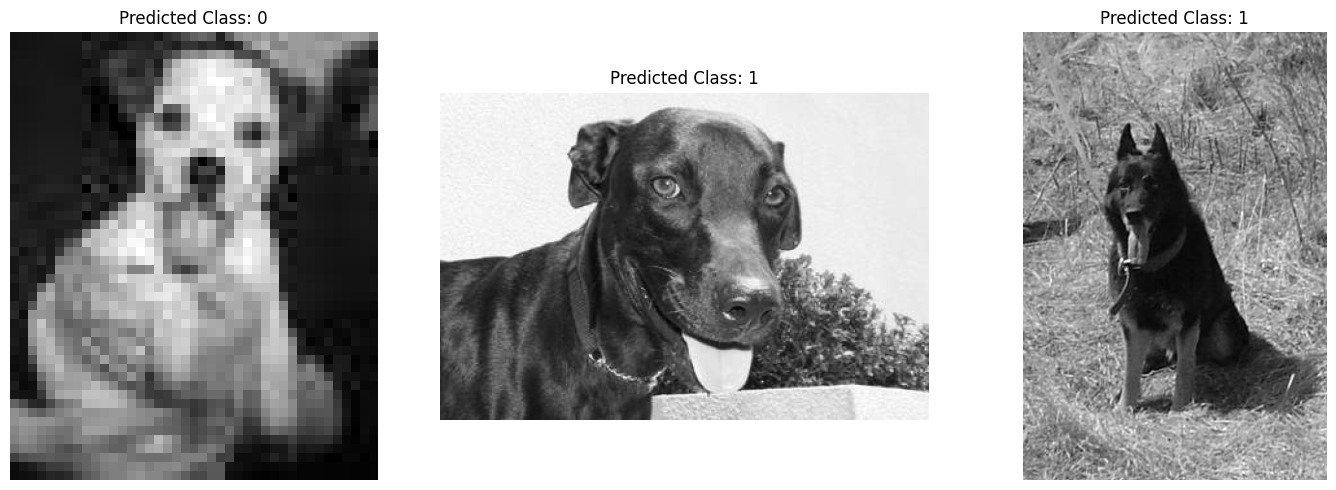

In [34]:

predict_random_images(test_data_dir, num_images=3)